## 正规方程##

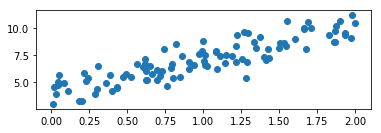

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)#这个n表示的是生成的参数具有正态分布
f1 = plt.figure(1)
plt.subplot(211)
plt.scatter(x,y)


使用np.linalg.inv计算矩阵逆，dot计算矩阵的乘法

In [3]:
x_b=np.c_[np.ones((100,1)),x]
print(x_b)
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print(theta_best)

[[1.         0.86018873]
 [1.         0.66346288]
 [1.         0.94205238]
 [1.         1.83111576]
 [1.         1.90147425]
 [1.         0.43078622]
 [1.         1.0276982 ]
 [1.         0.04544849]
 [1.         1.3382297 ]
 [1.         1.66336637]
 [1.         1.08612597]
 [1.         1.40021096]
 [1.         0.02988141]
 [1.         1.21495775]
 [1.         0.65173213]
 [1.         1.55346355]
 [1.         0.79869296]
 [1.         0.62197654]
 [1.         0.35895019]
 [1.         0.62634038]
 [1.         1.35015466]
 [1.         0.04768508]
 [1.         1.86576741]
 [1.         1.29802756]
 [1.         0.04988579]
 [1.         0.79031026]
 [1.         0.61626402]
 [1.         0.2911756 ]
 [1.         0.99111803]
 [1.         0.6965823 ]
 [1.         0.84918605]
 [1.         0.82071473]
 [1.         1.60286858]
 [1.         0.99794432]
 [1.         0.01566221]
 [1.         0.47442628]
 [1.         1.08329149]
 [1.         0.62951247]
 [1.         1.93362745]
 [1.         0.43295881]


使用训练得到的参数进行预测

In [4]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]#c_就是左右连接两个矩阵
y_predict=x_new_b.dot(theta_best)
print(y_predict)

[[ 4.09309739]
 [10.13234039]]


画出这个模型的图像

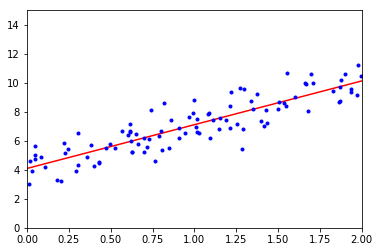

In [5]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])#x轴的范围 与 y轴的范围
plt.show()

## 使用sklearn可以达到相同效果 ##

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_,lin_reg.coef_)
lin_reg.predict(x_new)

[4.09309739] [[3.0196215]]


array([[ 4.09309739],
       [10.13234039]])

## 批量梯度下降 ##

In [7]:
eta=0.1 #学习率
n_iter=1000
m=len(y)
theta=np.random.randn(2,1)#随机初始值
for iter in range(n_iter):
    gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
    theta=theta-eta*gradients
print(theta)

[[4.09309739]
 [3.0196215 ]]


## 随机梯度下降 ##

1. 批量梯度下降用所有数据，比较费时。随机梯度下降用了很少的数据，使得可以在大规模数据集上使用
2. 另一方面，由于他的随机性，与批量梯度下降相比，呈现出更多的不规律性，他达到最小值不是平缓的下降，损失函数会忽高忽低，只是在大体上呈下降趋势。随着时间推移，他会非常靠近最小值，但不是不会停在一个值上，而是一直在一个值附近摆动。因此算法停止时，最后参数还不错，但不是最优值
3. 当损失函数不规则时，随机梯度下降能够跳过局部最小值，因此随机梯度下降在寻找全局最优值比批量梯度要好
4. 虽然可以跳过局部最优，但同时不能达到全局最小值，解决的一个方法时模拟退火，即逐渐降低学习率，开始步子大，变得越来越小

In [8]:
n_epochs=50
t0,t1=5,50#模拟退火算法超参数
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=x_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        #print(xi)
        #print(yi)
        #input()
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
print(theta)
 

[[4.07326547]
 [3.03618721]]


## 使用sklearn完成随机梯度下降 ##

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(x,y.ravel())
print(sgd_reg.intercept_,sgd_reg.coef_)

[4.07270031] [2.99922166]


D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


## 小批量梯度下降 ##

小批量，迭代每一步，使用一个随机小型实数集
小批量在参数空间上的表现比随机梯度要好很多，小批量比随机更靠近最小值，但是可能会陷入局部最小值中

## 多项式回归 ##

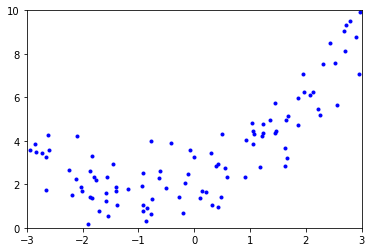

In [10]:
#生成非线性数据
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)
plt.plot(x,y,'b.')
plt.axis([-3,3,0,10])#x轴的范围 与 y轴的范围
plt.show()

可以清楚看出，直线不能恰当的拟合这些数据，于是使用sklean的PolynomiaFeatures类进行训练数据集的转换，让数据集每个特征平方作为新特征（仅存在一个特征）

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_features.fit_transform(x)
print(x[0])
print(x_poly[0])

[-0.7724936]
[-0.7724936   0.59674636]


In [12]:
#进行拟合
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)
print(lin_reg.intercept_,lin_reg.coef_)


[2.09167735] [[0.92146071 0.48741268]]


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if sys.path[0] == '':


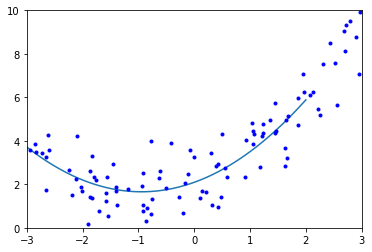

In [13]:
#dddd=list(range(-3,3,1))
#del list

from scipy.interpolate import spline
num=list(range(-3,3,1))
x_new=np.array(num)
y_predict=lin_reg.coef_[0][1]*(x_new**2)+lin_reg.coef_[0][0]*x_new+lin_reg.intercept_

xnew = np.linspace(x_new.min(),x_new.max(),300) 


power_smooth = spline(x_new,y_predict,xnew)
plt.plot(xnew,power_smooth)
plt.plot(x,y,'b.')
plt.axis([-3,3,0,10])#x轴的范围 与 y轴的范围
plt.show()

## 学习曲线 ##

使用高阶多项式回归很可能出现过拟合的情况，而线性模型则会欠拟合。在这个数据集上二次模型有很好的泛化能力。但是我们不知道这个数据的生成函数是什么，那我们如何决定模型复杂度呢？如何知道自己的模型时过拟合还是欠拟合
第二章我们知道可以使用交叉验证
这里我们学习观察学习曲线：画出模型在训练集上的表现，同时画出以训练集规模为自变量的训练集函数。为了得到图像，需要在训练集的不同规模子集上进行多次训练

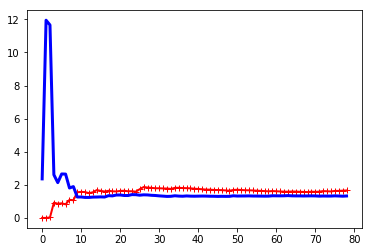

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,x,y):
    #切割训练集 验证机
    X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.2)
    #初始化训练误差 验证误差
    train_errors,val_errors=[],[]
    #抽取不同训练集合的子集
    for m in range(1,len(X_train)):
        #进行拟合
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,x,y)

红色时训练误差，蓝色时测试误差

先看训练集，只有一两个样本时可以很好拟合，样本变大时，误差变得更大，原因可能有两种，一是数据中有噪声，另一个时数据根本不是线性的。因此随着数据增大，误差也越来越大

再看测试误差，只有一个两个样本误差大，表示不能很好泛化，随着数据增多，逐渐下降，但是线性函数不能很好拟合数据，所以最后停在要给高原地带并趋于稳定

**这是典型的欠拟合曲线，两条曲线都达到高原地带并趋于稳定，并且最后两条曲线非常接近，同时误差值又很大**

我们看下10阶多项式回归拟合的学习曲线

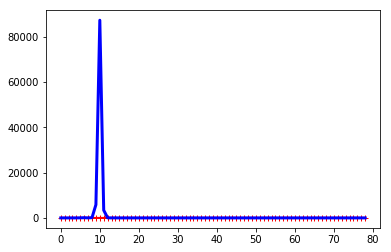

In [15]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline((
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("sgd_reg",LinearRegression()),
))
plot_learning_curves(polynomial_regression,x,y)

这幅图与上一个图主要有两个不同点：
1. 训练集误差比线性回归低很多
2. 两条曲线有间隔，即训练集表现比测试集好，这是过拟合的显著特点

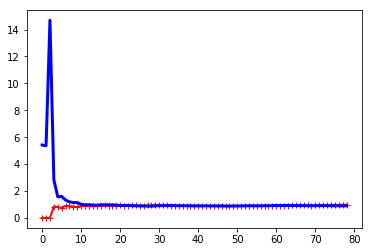

In [16]:
#尝试二次
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline((
    ("poly_features",PolynomialFeatures(degree=2,include_bias=False)),
    ("sgd_reg",LinearRegression()),
))
plot_learning_curves(polynomial_regression,x,y)

偏差：泛华误差的这部分误差是由于错误的假设决定的。例如实际是一个二次模型，你却假设了一个线性模型，一个高偏差的模型最容易出欠拟合

方差：这部分误差由于模型对微小变化较为敏感，一个多自由度的模型更容易有高的方差（例如高阶多项式）因此容易过拟合

（1）如果高偏差，即欠拟合：可以A：增加更多的特征个数  B：使用更复杂的模型，使用更复杂的网络

（2）如果高方差，即过拟合：可以A：增加更多的数据   B:正则化

# 线性模型的正则化 #


## 岭（Ridge）回归 ##
损失函数后面加上l2平方的一半

<img src='images/ling.png'/>

In [18]:
#使用sklearn进行封闭方程的求解
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[4.9380509]])

In [19]:
#使用随机梯度进行求解
sgd_reg=SGDRegressor(penalty='l2')
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.07096251])

# Lasso回归 #
损失函数后面加l1范数